<a href="https://colab.research.google.com/github/ReynaldiJ/portfolio/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_raw = pd.read_excel("/content/titanic_train.xlsx")

In [ ]:
df_raw.info()

In [ ]:
df_raw.head()

In [ ]:
df_raw.describe()

In [ ]:
#data exploration

#survivability

sns.countplot(x='Survived', data = df_raw)

In [ ]:
#survivability

sns.countplot(x='Survived', hue = 'Sex', data = df_raw)

In [ ]:
sns.countplot(x='Survived', hue = 'Pclass', data = df_raw)

In [ ]:
#aggregation

df_raw.groupby('Pclass').mean()

In [ ]:
df_raw.groupby('Pclass')['Survived'].mean().plot.bar()

In [ ]:
#Survivability having Parent/Children

sns.countplot(x='Survived', hue = 'SibSp', data = df_raw)

In [ ]:
#Survivability having Sibling/Spouse

sns.countplot(x='Survived', hue = 'Parch', data = df_raw)

In [ ]:
#Distribusi Umur

df_raw['Age'].hist()

<Axes: xlabel='Survived', ylabel='Age'>

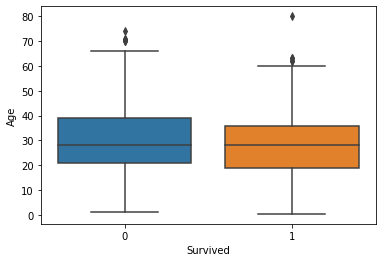

In [ ]:
#Age Survivability

sns.boxplot(x='Survived', y = 'Age', data = df_raw)

<Axes: xlabel='Pclass', ylabel='Age'>

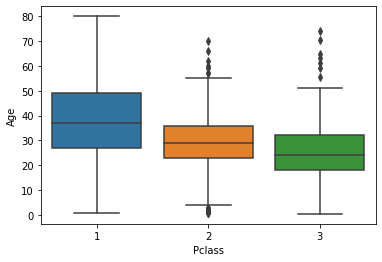

In [ ]:
#Age dist in different class

sns.boxplot(x='Pclass', y = 'Age', data = df_raw)

In [ ]:
mean_age_perclass = df_raw.groupby('Pclass')['Age'].mean()
mean_age_perclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
#Inmpute data

age_list = list(mean_age_perclass)

def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return age_list[0]
    elif Pclass == 2:
      return age_list[1]
    else:
      return age_list[2]
  else:
    return Age

df_clean = df_raw.copy()
df_clean['Age'] = df_clean[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_clean.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
df_clean.dropna(inplace = True)
df_clean.reset_index(inplace = True)

df_clean.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#check point

df_eng = df_clean.copy()

In [ ]:
#feature engineering

sex = pd.get_dummies(df_eng['Sex'], drop_first = True)
embarked = pd.get_dummies(df_eng['Embarked'], drop_first = True)

In [ ]:
#merge

df_eng.drop(['Sex','Embarked'], axis = 1, inplace = True)
df_eng = pd.concat([df_eng,sex,embarked], axis = 1)

df_eng

In [ ]:
#check point

df_final = df_eng.copy()

In [ ]:
#Library ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
#split data

x_train, x_validation, y_train, y_validation = train_test_split(df_final.drop('Survived', axis = 1),
                                                                df_final['Survived'],
                                                                test_size = 0.3,
                                                                random_state = 99)

In [ ]:
#train
log_model = LogisticRegression(n_jobs = 4, C = 99/1000)
log_model.fit(x_train, y_train)

predict = log_model.predict(x_train)
report = classification_report(y_train, predict)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       386
           1       0.80      0.66      0.72       236

    accuracy                           0.81       622
   macro avg       0.81      0.78      0.79       622
weighted avg       0.81      0.81      0.80       622



In [ ]:
#validation
predict = log_model.predict(x_validation)
report = classification_report(y_validation, predict)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       163
           1       0.71      0.66      0.69       104

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



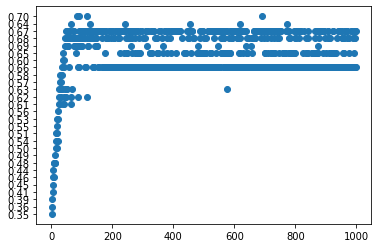

In [ ]:
#optimization

iterasi = 1000
f1 = [0]*iterasi
id = [0]*iterasi

for i in range(1,iterasi):
  log_model = LogisticRegression(n_jobs = 4, C = i/1000)
  log_model.fit(x_train, y_train)
  predict = log_model.predict(x_validation)
  report = classification_report(y_validation, predict)
  l = report.split()
  f1[i] = l[12]
  id[i] = i

plt.scatter(id[1::], f1[1::])
plt.show()

In [ ]:
pd.Series(f1).head(100)

0        0
1     0.35
2     0.36
3     0.39
4     0.41
      ... 
95    0.68
96    0.68
97    0.67
98    0.69
99    0.69
Length: 100, dtype: object

In [ ]:
print(report.split())

['precision', 'recall', 'f1-score', 'support', '0', '0.79', '0.83', '0.81', '163', '1', '0.71', '0.66', '0.69', '104', 'accuracy', '0.76', '267', 'macro', 'avg', '0.75', '0.75', '0.75', '267', 'weighted', 'avg', '0.76', '0.76', '0.76', '267']
